In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../Descriptores_moleculares/Dataframes_descriptores/des_ESR1.csv")

# Visualizar datos
<hr>

In [3]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL1479,DANAZOL,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,IC50,'=',17790.00,nM,11.075595,11.075595,0.113574,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL85650,NaN,CC(C)C[C@H]1Sc2cc(O)ccc2O[C@H]1c1ccc(OCCN2CCCC...,IC50,'=',3.00,nM,9.838085,9.838085,0.002923,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL101997,NaN,CC1(c2ccc(OCCN3CCCC3)cc2)c2ccc(O)cc2CCN1c1ccc(...,IC50,'=',31.00,nM,13.634593,13.634593,0.237762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL100763,NaN,CC1(c2ccc(OCCN3CCCC3)cc2)c2ccc(O)cc2CCN1c1ccc(...,IC50,'=',26.98,nM,10.091639,10.091639,0.317401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL394614,NaN,O/N=C/c1ccc(-c2ccc(O)cc2)c2occc12,IC50,'=',1330.00,nM,9.322322,9.322322,0.225438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Añadir el valor de 1000
<hr>

In [4]:
# 1 significa inhibidor
# 0 significa no inhibidor

def inhibidor(IC50):
    if IC50 > 1000:
        return 0
    else:
        return 1

In [5]:
df["Inhibidor"] = df["Standard Value"].apply(inhibidor)

In [6]:
df.to_csv("Datos_con_1000/ESR1_1000.csv", index=False)

# Escalado de datos
<hr>

In [6]:
col_names = df.columns[7:217]

In [7]:
descriptors = df[col_names]

In [8]:
descriptors.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.075595,11.075595,0.113574,-0.908859,0.721043,47.760000,337.463,310.247,337.204179,132.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.838085,9.838085,0.002923,-0.002923,0.595975,21.833333,427.610,394.346,427.218115,162.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.634593,13.634593,0.237762,-0.465085,0.555101,20.606061,446.566,415.318,446.236956,172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.091639,10.091639,0.317401,-0.385720,0.498357,20.606061,463.021,431.773,462.207406,172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.322322,9.322322,0.225438,0.225438,0.416230,11.368421,253.257,242.169,253.073893,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
scaled_data = scaler.fit_transform(descriptors)

In [11]:
df_scaled = pd.DataFrame(scaled_data, columns=descriptors.columns)

In [12]:
df_scaled

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.596356,0.596356,0.096567,0.743322,0.762541,0.735237,0.065143,0.064122,0.065129,0.064965,...,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.497912,0.497912,0.002486,0.854850,0.628106,0.233259,0.106143,0.105563,0.106095,0.099768,...,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.799924,0.799924,0.202159,0.797954,0.584170,0.209497,0.114764,0.115897,0.114750,0.111369,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.518083,0.518083,0.269872,0.807725,0.523176,0.209497,0.122248,0.124005,0.122018,0.111369,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.456883,0.456883,0.191680,0.882963,0.434898,0.030643,0.026846,0.030576,0.026842,0.020882,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,0.964033,0.964033,0.015691,0.659216,0.416140,0.172317,0.131110,0.136587,0.131114,0.122970,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2582,0.994973,0.994973,0.021022,0.656344,0.263894,0.156062,0.164996,0.171810,0.164782,0.148492,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2583,0.813275,0.813275,0.139441,0.358646,0.205067,0.198708,0.196192,0.206603,0.196591,0.148492,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2584,0.885720,0.885720,0.140296,0.429680,0.157672,0.090353,0.185743,0.194785,0.185719,0.167053,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0


# Filtro de baja varianza
<hr>

In [13]:
df_scaled.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.596356,0.596356,0.096567,0.743322,0.762541,0.735237,0.065143,0.064122,0.065129,0.064965,...,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.497912,0.497912,0.002486,0.854850,0.628106,0.233259,0.106143,0.105563,0.106095,0.099768,...,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.799924,0.799924,0.202159,0.797954,0.584170,0.209497,0.114764,0.115897,0.114750,0.111369,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.518083,0.518083,0.269872,0.807725,0.523176,0.209497,0.122248,0.124005,0.122018,0.111369,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.456883,0.456883,0.191680,0.882963,0.434898,0.030643,0.026846,0.030576,0.026842,0.020882,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
threshold = 0.01

In [15]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=threshold)

In [16]:
selector.fit(df_scaled)

VarianceThreshold(threshold=0.01)

In [17]:
des_var= df_scaled.loc[:, selector.get_support()]

In [18]:
des_var

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,...,fr_ketone_Topliss,fr_methoxy,fr_nitrile,fr_oxazole,fr_phenol,fr_phenol_noOrthoHbond,fr_piperzine,fr_sulfonamd,fr_thiophene,fr_urea
0,0.596356,0.596356,0.096567,0.743322,0.762541,0.735237,0.189230,0.558105,0.419209,0.237907,...,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.497912,0.497912,0.002486,0.854850,0.628106,0.233259,0.142982,0.254517,0.726220,0.179762,...,0.0,0.00,0.0,0.0,0.166667,0.166667,0.0,0.0,0.0,0.0
2,0.799924,0.799924,0.202159,0.797954,0.584170,0.209497,0.120047,0.254433,0.726305,0.150928,...,0.0,0.00,0.0,0.0,0.166667,0.166667,0.0,0.0,0.0,0.0
3,0.518083,0.518083,0.269872,0.807725,0.523176,0.209497,0.113074,0.254433,0.726305,0.142161,...,0.0,0.00,0.0,0.0,0.166667,0.166667,0.0,0.0,0.0,0.0
4,0.456883,0.456883,0.191680,0.882963,0.434898,0.030643,0.153306,0.254410,0.726329,0.192742,...,0.0,0.00,0.0,0.0,0.166667,0.166667,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,0.964033,0.964033,0.015691,0.659216,0.416140,0.172317,0.528744,0.327488,0.652427,0.664756,...,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2582,0.994973,0.994973,0.021022,0.656344,0.263894,0.156062,0.492724,0.282095,0.698331,0.619471,...,0.0,0.25,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2583,0.813275,0.813275,0.139441,0.358646,0.205067,0.198708,NaN,NaN,NaN,NaN,...,0.0,0.00,0.0,0.0,0.166667,0.166667,0.0,0.0,0.0,0.0
2584,0.885720,0.885720,0.140296,0.429680,0.157672,0.090353,0.379417,0.285763,0.694621,0.477017,...,0.0,0.25,0.0,0.0,0.000000,0.000000,0.0,0.0,0.5,0.0


In [19]:
des_var.to_csv("Baja_varianza/ESR1_var.csv", index=False)

# Determinación de correlación
<hr>

In [20]:
correlation_spearman = des_var.corr(method='spearman')

In [21]:
correlation_spearman

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,...,fr_ketone_Topliss,fr_methoxy,fr_nitrile,fr_oxazole,fr_phenol,fr_phenol_noOrthoHbond,fr_piperzine,fr_sulfonamd,fr_thiophene,fr_urea
MaxAbsEStateIndex,1.000000,1.000000,-0.310984,-0.700646,-0.264067,0.221069,0.515319,0.215917,-0.202675,0.512285,...,0.129080,0.101016,-0.058987,-0.090612,-0.241108,-0.241108,0.070552,0.123625,0.079148,0.049318
MaxEStateIndex,1.000000,1.000000,-0.310984,-0.700646,-0.264067,0.221069,0.515319,0.215917,-0.202675,0.512285,...,0.129080,0.101016,-0.058987,-0.090612,-0.241108,-0.241108,0.070552,0.123625,0.079148,0.049318
MinAbsEStateIndex,-0.310984,-0.310984,1.000000,0.261970,0.063678,-0.120305,-0.149425,0.056944,-0.057253,-0.147517,...,-0.067931,0.027658,-0.032607,0.009228,-0.091727,-0.091727,-0.057964,-0.038460,0.054957,-0.009388
MinEStateIndex,-0.700646,-0.700646,0.261970,1.000000,0.166028,-0.144219,-0.666923,-0.204548,0.172894,-0.661857,...,0.050772,-0.080336,0.027619,0.072984,0.193707,0.193707,0.066764,-0.274660,0.005695,-0.096902
qed,-0.264067,-0.264067,0.063678,0.166028,1.000000,-0.067915,-0.154730,0.108856,-0.126390,-0.160946,...,0.282754,-0.053467,0.073610,0.145324,0.074085,0.074085,-0.105665,0.107106,-0.184024,0.049475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_phenol_noOrthoHbond,-0.241108,-0.241108,-0.091727,0.193707,0.074085,-0.191987,-0.283373,-0.724744,0.707519,-0.277386,...,-0.077807,-0.171782,-0.031851,0.146705,1.000000,1.000000,-0.023359,-0.074236,-0.017222,-0.117319
fr_piperzine,0.070552,0.070552,-0.057964,0.066764,-0.105665,0.060921,0.020450,-0.025356,0.023041,0.018433,...,-0.004839,0.046939,-0.008903,-0.038067,-0.023359,-0.023359,1.000000,-0.039677,0.091411,0.106947
fr_sulfonamd,0.123625,0.123625,-0.038460,-0.274660,0.107106,-0.036047,0.121063,0.009756,-0.012764,0.118058,...,-0.045540,-0.002069,-0.036885,-0.034993,-0.074236,-0.074236,-0.039677,1.000000,-0.000868,-0.020339
fr_thiophene,0.079148,0.079148,0.054957,0.005695,-0.184024,-0.153016,0.075848,0.034797,-0.039615,0.077908,...,-0.056647,0.001010,-0.032778,-0.037084,-0.017222,-0.017222,0.091411,-0.000868,1.000000,0.010038


In [22]:
correlation_spearman_abs = correlation_spearman.abs()

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


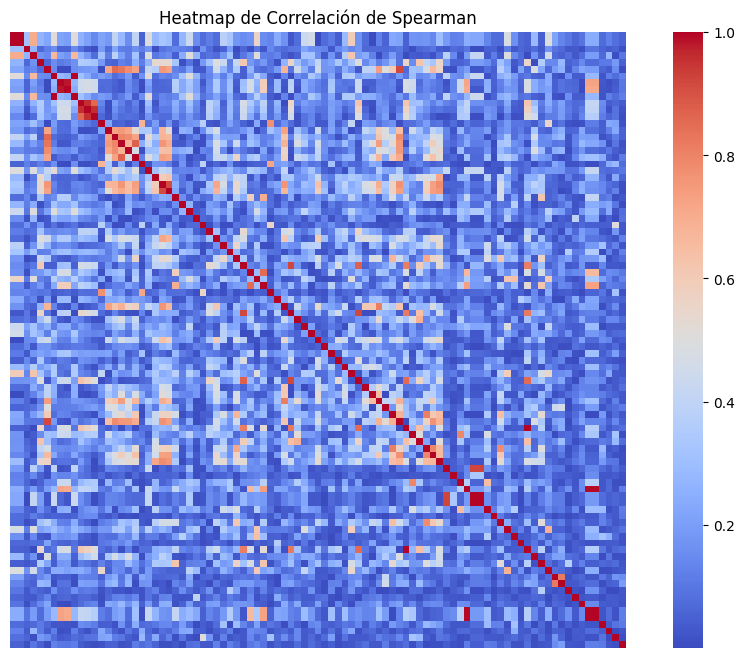

In [24]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el heatmap
sns.heatmap(correlation_spearman_abs, cmap='coolwarm', fmt='.2f', square=True, xticklabels=False, yticklabels=False)

# Configurar los títulos y etiquetas
plt.title('Heatmap de Correlación de Spearman')
plt.show()


In [25]:
import random

to_keep = []

for col in correlation_spearman.columns:
    for idx in range(len(correlation_spearman)):
        # Usa .iloc para acceder a los elementos por posición
        if abs(correlation_spearman.iloc[idx][col]) > 0.85 and col != correlation_spearman.index[idx]:
            # Solo agregar si la variable no está ya en la lista para evitar duplicados
            if col not in to_keep and correlation_spearman.index[idx] not in to_keep:
                # Elegir aleatoriamente una variable del par
                selected_variable = random.choice([col, correlation_spearman.index[idx]])
                if selected_variable not in to_keep:
                    to_keep.append(selected_variable)

# Ahora 'to_keep' contendrá las variables seleccionadas
print("Variables seleccionadas:", to_keep)


Variables seleccionadas: ['MaxAbsEStateIndex', 'BCUT2D_CHGHI', 'NumAliphaticRings', 'MinAbsPartialCharge', 'MaxAbsPartialCharge', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_LOGPLOW', 'Chi4v', 'SMR_VSA7', 'SlogP_VSA11', 'SlogP_VSA6', 'NumAromaticCarbocycles', 'VSA_EState6', 'fr_COO', 'fr_COO2', 'fr_phenol', 'fr_Ar_OH']


In [26]:
df_corr = des_var.drop(columns=to_keep)

In [27]:
correlation_spearman = df_corr.corr(method='spearman')

In [28]:
correlation_spearman_abs = correlation_spearman.abs()

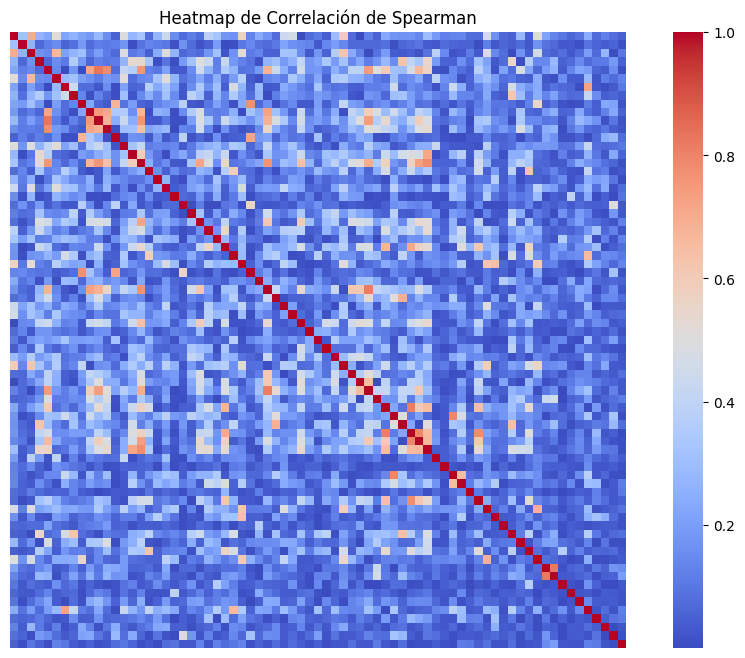

In [29]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el heatmap
sns.heatmap(correlation_spearman_abs, cmap='coolwarm', fmt='.2f', square=True, xticklabels=False, yticklabels=False)

# Configurar los títulos y etiquetas
plt.title('Heatmap de Correlación de Spearman')
plt.show()


In [30]:
df_corr.to_csv("Alta_correlacion/ESR1_corr.csv", index=False)

# Determinación de normalidad
<hr>

In [31]:
dic_norm = {}

In [32]:
from scipy.stats import anderson

for i in df_corr.columns:
    result = anderson(df_corr[i], dist="norm")
    if result.statistic > result.critical_values[2]:
        resultado = 0 # No es normal
    else:
        resultado = 1 # Es normal
    dic_norm[i] = resultado

# Pruebas de hipótesis
<hr>

In [33]:
df_h = pd.concat((df_corr, df["Inhibidor"]), axis=1)

In [34]:
df_h

,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MWLOW,...,fr_ketone_Topliss,fr_methoxy,fr_nitrile,fr_oxazole,fr_phenol_noOrthoHbond,fr_piperzine,fr_sulfonamd,fr_thiophene,fr_urea,Inhibidor
0,0.596356,0.096567,0.743322,0.762541,0.735237,0.189230,0.558105,0.629479,0.015509,0.081236,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
1,0.497912,0.002486,0.854850,0.628106,0.233259,0.142982,0.254517,0.534424,0.155512,0.450987,...,0.0,0.00,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,1
2,0.799924,0.202159,0.797954,0.584170,0.209497,0.120047,0.254433,0.425378,0.039423,0.294575,...,0.0,0.00,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,1
3,0.518083,0.269872,0.807725,0.523176,0.209497,0.113074,0.254433,0.425378,0.185184,0.294599,...,0.0,0.00,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,1
4,0.456883,0.191680,0.882963,0.434898,0.030643,0.153306,0.254410,0.466528,0.015276,0.466083,...,0.0,0.00,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,0.964033,0.015691,0.659216,0.416140,0.172317,0.528744,0.327488,0.602321,0.039480,0.369055,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
2582,0.994973,0.021022,0.656344,0.263894,0.156062,0.492724,0.282095,0.588393,0.185184,0.364578,...,0.0,0.25,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
2583,0.813275,0.139441,0.358646,0.205067,0.198708,NaN,NaN,0.267806,NaN,NaN,...,0.0,0.00,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,1
2584,0.885720,0.140296,0.429680,0.157672,0.090353,0.379417,0.285763,0.531191,0.155217,0.457607,...,0.0,0.25,0.0,0.0,0.000000,0.0,0.0,0.5,0.0,1


In [35]:
grupo_inhibidor = df_corr[df_h["Inhibidor"] == 1]

In [36]:
grupo_inhibidor

,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MWLOW,...,fr_ketone,fr_ketone_Topliss,fr_methoxy,fr_nitrile,fr_oxazole,fr_phenol_noOrthoHbond,fr_piperzine,fr_sulfonamd,fr_thiophene,fr_urea
1,0.497912,0.002486,0.854850,0.628106,0.233259,0.142982,0.254517,0.534424,0.155512,0.450987,...,0.0,0.0,0.00,0.0,0.0,0.166667,0.0,0.0,0.0,0.0
2,0.799924,0.202159,0.797954,0.584170,0.209497,0.120047,0.254433,0.425378,0.039423,0.294575,...,0.0,0.0,0.00,0.0,0.0,0.166667,0.0,0.0,0.0,0.0
3,0.518083,0.269872,0.807725,0.523176,0.209497,0.113074,0.254433,0.425378,0.185184,0.294599,...,0.0,0.0,0.00,0.0,0.0,0.166667,0.0,0.0,0.0,0.0
5,0.519249,0.284707,0.813029,0.575161,0.209497,0.113074,0.254433,0.404804,0.015674,0.294421,...,0.0,0.0,0.00,0.0,0.0,0.166667,0.0,0.0,0.0,0.0
6,0.505155,0.020607,0.829189,0.506466,0.246460,0.150116,0.254409,0.445953,0.155512,0.459813,...,0.0,0.0,0.00,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,0.964033,0.015691,0.659216,0.416140,0.172317,0.528744,0.327488,0.602321,0.039480,0.369055,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2582,0.994973,0.021022,0.656344,0.263894,0.156062,0.492724,0.282095,0.588393,0.185184,0.364578,...,0.0,0.0,0.25,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2583,0.813275,0.139441,0.358646,0.205067,0.198708,NaN,NaN,0.267806,NaN,NaN,...,0.0,0.0,0.00,0.0,0.0,0.166667,0.0,0.0,0.0,0.0
2584,0.885720,0.140296,0.429680,0.157672,0.090353,0.379417,0.285763,0.531191,0.155217,0.457607,...,0.0,0.0,0.25,0.0,0.0,0.000000,0.0,0.0,0.5,0.0


In [37]:
grupo_no_inhibidor = df_corr[df_h["Inhibidor"] == 0]

In [38]:
grupo_no_inhibidor

,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MWLOW,...,fr_ketone,fr_ketone_Topliss,fr_methoxy,fr_nitrile,fr_oxazole,fr_phenol_noOrthoHbond,fr_piperzine,fr_sulfonamd,fr_thiophene,fr_urea
0,0.596356,0.096567,0.743322,0.762541,0.735237,0.189230,0.558105,0.629479,0.015509,0.081236,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.456883,0.191680,0.882963,0.434898,0.030643,0.153306,0.254410,0.466528,0.015276,0.466083,...,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0
9,0.462391,0.202080,0.884469,0.720869,0.017057,0.107720,0.254410,0.277927,0.013703,0.530419,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
10,0.481496,0.170589,0.879910,0.751984,0.019434,0.132610,0.254410,0.359323,0.581130,0.530061,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
14,0.693148,0.198299,0.777091,0.695681,0.007128,0.504264,0.348325,0.414300,0.016231,0.586350,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,0.786419,0.144722,0.285413,0.685958,0.163147,0.615926,0.290829,0.466528,0.041839,0.404720,...,0.5,0.5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
2550,0.462579,0.198262,0.883917,0.856060,0.156889,0.125062,0.254409,0.428808,0.015692,0.392792,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
2569,0.824155,0.099559,0.389382,0.203290,0.183682,0.435672,0.254410,0.373942,0.156108,0.344724,...,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,1.0,0.0,0.0
2570,0.810705,0.011187,0.269739,0.507210,0.230570,0.617677,0.254410,0.353367,0.156108,0.345089,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,1.0,0.0,0.0


In [39]:
p_values = {}

In [40]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

for i in df_h.columns:
    if i == "Inhibidor":
        break
    if dic_norm == 0:
        estadistica, p_valor = ttest_ind(grupo_inhibidor[i], grupo_no_inhibidor[i])
    else:
        estadistica, p_valor = mannwhitneyu(grupo_inhibidor[i], grupo_no_inhibidor[i])

    if p_valor > 0.05:
        p_values[i] = 0 # Los grupos son iguales y por lo tanto, no es significativa
    else:
        p_values[i] = 1 # Los grupos son diferentes y por lo tanto, es significativa

In [41]:
p_values

{'MaxEStateIndex': 1,
 'MinAbsEStateIndex': 0,
 'MinEStateIndex': 0,
 'qed': 1,
 'SPS': 1,
 'MaxPartialCharge': 1,
 'MinPartialCharge': 1,
 'FpDensityMorgan1': 1,
 'BCUT2D_MWHI': 1,
 'BCUT2D_MWLOW': 1,
 'BCUT2D_CHGLO': 1,
 'BCUT2D_LOGPHI': 1,
 'BCUT2D_MRHI': 1,
 'BCUT2D_MRLOW': 1,
 'AvgIpc': 1,
 'Chi4n': 1,
 'PEOE_VSA10': 1,
 'PEOE_VSA13': 1,
 'PEOE_VSA3': 1,
 'PEOE_VSA4': 1,
 'PEOE_VSA5': 0,
 'PEOE_VSA6': 1,
 'PEOE_VSA7': 1,
 'PEOE_VSA8': 1,
 'PEOE_VSA9': 1,
 'SMR_VSA6': 1,
 'SMR_VSA9': 1,
 'SlogP_VSA10': 0,
 'SlogP_VSA12': 1,
 'SlogP_VSA4': 1,
 'SlogP_VSA5': 1,
 'SlogP_VSA8': 0,
 'EState_VSA11': 1,
 'EState_VSA3': 1,
 'EState_VSA4': 1,
 'EState_VSA5': 1,
 'EState_VSA6': 1,
 'EState_VSA7': 1,
 'EState_VSA8': 1,
 'VSA_EState1': 1,
 'VSA_EState7': 1,
 'VSA_EState8': 1,
 'FractionCSP3': 1,
 'NumAliphaticCarbocycles': 0,
 'NumAliphaticHeterocycles': 1,
 'NumAromaticHeterocycles': 1,
 'NumAromaticRings': 1,
 'NumSaturatedHeterocycles': 1,
 'NumSaturatedRings': 1,
 'RingCount': 1,
 'fr_Al_C

In [42]:
p_df = pd.Series(p_values)

In [43]:
p_df.value_counts()

1    62
0    11
Name: count, dtype: int64

In [44]:
p_names = p_df[p_df == 1].index

In [45]:
p_names

Index(['MaxEStateIndex', 'qed', 'SPS', 'MaxPartialCharge', 'MinPartialCharge',
       'FpDensityMorgan1', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGLO',
       'BCUT2D_LOGPHI', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'Chi4n',
       'PEOE_VSA10', 'PEOE_VSA13', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA6',
       'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA6', 'SMR_VSA9',
       'SlogP_VSA12', 'SlogP_VSA4', 'SlogP_VSA5', 'EState_VSA11',
       'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6',
       'EState_VSA7', 'EState_VSA8', 'VSA_EState1', 'VSA_EState7',
       'VSA_EState8', 'FractionCSP3', 'NumAliphaticHeterocycles',
       'NumAromaticHeterocycles', 'NumAromaticRings',
       'NumSaturatedHeterocycles', 'NumSaturatedRings', 'RingCount',
       'fr_Al_COO', 'fr_Ar_N', 'fr_NH0', 'fr_Ndealkylation2',
       'fr_alkyl_halide', 'fr_aniline', 'fr_aryl_methyl', 'fr_benzene',
       'fr_bicyclic', 'fr_ether', 'fr_halogen', 'fr_ketone_Topliss',
       'fr_methoxy', 'fr_nitrile', 'f

In [46]:
df_p_final = df_h[p_names]

In [47]:
df_p_final

,MaxEStateIndex,qed,SPS,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGLO,BCUT2D_LOGPHI,...,fr_bicyclic,fr_ether,fr_halogen,fr_ketone_Topliss,fr_methoxy,fr_nitrile,fr_oxazole,fr_phenol_noOrthoHbond,fr_sulfonamd,fr_urea
0,0.596356,0.762541,0.735237,0.189230,0.558105,0.629479,0.015509,0.081236,0.141250,0.874443,...,0.750,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0
1,0.497912,0.628106,0.233259,0.142982,0.254517,0.534424,0.155512,0.450987,0.418124,0.594065,...,0.125,0.333333,0.000000,0.0,0.00,0.0,0.0,0.166667,0.0,0.0
2,0.799924,0.584170,0.209497,0.120047,0.254433,0.425378,0.039423,0.294575,0.258560,0.537524,...,0.125,0.166667,0.111111,0.0,0.00,0.0,0.0,0.166667,0.0,0.0
3,0.518083,0.523176,0.209497,0.113074,0.254433,0.425378,0.185184,0.294599,0.258356,0.539736,...,0.125,0.166667,0.111111,0.0,0.00,0.0,0.0,0.166667,0.0,0.0
4,0.456883,0.434898,0.030643,0.153306,0.254410,0.466528,0.015276,0.466083,0.763387,0.348896,...,0.125,0.000000,0.000000,0.0,0.00,0.0,0.0,0.166667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,0.964033,0.416140,0.172317,0.528744,0.327488,0.602321,0.039480,0.369055,0.319712,0.520912,...,0.375,0.000000,0.333333,0.0,0.00,0.0,0.0,0.000000,0.0,0.0
2582,0.994973,0.263894,0.156062,0.492724,0.282095,0.588393,0.185184,0.364578,0.319414,0.550818,...,0.375,0.166667,0.444444,0.0,0.25,0.0,0.0,0.000000,0.0,0.0
2583,0.813275,0.205067,0.198708,NaN,NaN,0.267806,NaN,NaN,NaN,NaN,...,0.375,0.166667,0.000000,0.0,0.00,0.0,0.0,0.166667,0.0,0.0
2584,0.885720,0.157672,0.090353,0.379417,0.285763,0.531191,0.155217,0.457607,0.352606,0.640794,...,0.375,0.333333,0.555556,0.0,0.25,0.0,0.0,0.000000,0.0,0.0


In [48]:
df_p_final.to_csv("Prueba_hipotesis/ESR1_h.csv", index=False)